In [1]:
## library(igraph)
library(Seurat)
library(tidyverse)
library(ggplot2)
library(ggrepel)
library(ggbeeswarm)
library(patchwork)
library(writexl)
options(ggrepel.max.overlaps = Inf)

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
combined_deg_seurat_all = qs::qread('_targets/objects/combined_gost_seurat_formatted')
combined_deg_seurat_all %>% head

tag,data_day,cluster,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,⋯,recall,term_id,source,term_name,effective_domain_size,source_order,parents,evidence_codes,intersection,gene_ids
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<chr>,<chr>,<chr>
a1_Tany__Astrocytes___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.neg_vs_none,all,a1_Tany__Astrocytes,all,obob5v5,all,obob14vBL6,fgf1_grouping,neg,none,⋯,0.012648221,GO:0007399,GO:BP,nervous system development,27334,2985,GO:0048731,"IEA,IDA IMP IEA,IGI IBA,IMP IGI,IDA,IMP,IMP IBA,IMP ISO IEA,IDA IBA IEA,IMP IEA,IEA,IDA IMP IBA,IDA IMP IGI ISO IBA,IGI,ISO,IBA,IDA IMP IGI ISO IEA,IMP IGI ISO IBA IEA,IMP,IMP,IMP IBA,IGI IEA,IMP,ISO,IMP IGI IBA,IEA,IBA,IDA IMP IGI ISO IBA IEA,ISO,IMP IEA,IEA,IMP ISS ISO IEA","ENSMUSG00000038872,ENSMUSG00000032076,ENSMUSG00000019899,ENSMUSG00000025932,ENSMUSG00000066687,ENSMUSG00000020704,ENSMUSG00000030223,ENSMUSG00000020122,ENSMUSG00000035131,ENSMUSG00000031137,ENSMUSG00000053166,ENSMUSG00000034912,ENSMUSG00000024304,ENSMUSG00000037784,ENSMUSG00000075415,ENSMUSG00000014361,ENSMUSG00000021466,ENSMUSG00000015222,ENSMUSG00000005360,ENSMUSG00000017548,ENSMUSG00000040957,ENSMUSG00000066392,ENSMUSG00000027684,ENSMUSG00000059974,ENSMUSG00000029765,ENSMUSG00000022762,ENSMUSG00000064115,ENSMUSG00000025810,ENSMUSG00000037852,ENSMUSG00000024076,ENSMUSG00000029381,ENSMUSG00000063063","Zfhx3,Cadm1,Lama2,Eya1,Zbtb16,Asic2,Ptpro,Egfr,Brinp3,Fgf13,Cdh22,Mdga2,Cdh2,Dzip1l,Fnbp1,Mertk,Ptch1,Map2,Slc1a3,Suz12,Cables1,Nrxn3,Mecom,Ntm,Plxna4,Ncam2,Cadm2,Nrp1,Cpe,Vit,Shroom3,Ctnna2"
a1_Tany__Astrocytes___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.neg_vs_none,all,a1_Tany__Astrocytes,all,obob5v5,all,obob14vBL6,fgf1_grouping,neg,none,⋯,0.009796718,GO:0048731,GO:BP,system development,27334,13811,"GO:0007275, GO:0048856","IMP IBA,IEA,IDA IMP ISO IEA,IGI IBA,IMP IGI,IDA IMP ISS ISO IEA,IMP,IEA,IBA NAS IEA,IEA,IMP ISS ISO IBA IEA,IMP IGI ISO IEA,IEA,IDA IBA IEA,IMP IEA,IEA,IDA IMP IBA,IDA IMP IGI ISO IBA,IGI,ISO,IMP IGI IBA,IDA IMP IGI ISO IEA,IMP IGI ISO IBA IEA,IMP,IMP,IMP IBA,IEA,IGI IEA,IMP IGI,ISO,IMP IGI IBA,IEA,IEA,ISS ISO IBA IEA,IBA,IDA IMP IGI ISO IBA IC IEA,ISO IEA,IMP IEA,IEA,IMP ISS ISO IEA","ENSMUSG00000020354,ENSMUSG00000038872,ENSMUSG00000032076,ENSMUSG00000019899,ENSMUSG00000025932,ENSMUSG00000066687,ENSMUSG00000020704,ENSMUSG00000004328,ENSMUSG00000020709,ENSMUSG00000022419,ENSMUSG00000030223,ENSMUSG00000020122,ENSMUSG00000021340,ENSMUSG00000035131,ENSMUSG00000031137,ENSMUSG00000053166,ENSMUSG00000034912,ENSMUSG00000024304,ENSMUSG00000037784,ENSMUSG00000075415,ENSMUSG00000014361,ENSMUSG00000021466,ENSMUSG00000015222,ENSMUSG00000005360,ENSMUSG00000017548,ENSMUSG00000040957,ENSMUSG00000030111,ENSMUSG00000066392,ENSMUSG00000027684,ENSMUSG00000059974,ENSMUSG00000029765,ENSMUSG00000022762,ENSMUSG00000021136,ENSMUSG00000053702,ENSMUSG00000064115,ENSMUSG00000025810,ENSMUSG00000037852,ENSMUSG00000024076,ENSMUSG00000029381,ENSMUSG00000063063","Sgcd,Zfhx3,Cadm1,Lama2,Eya1,Zbtb16,Asic2,Hif3a,Adap2,Deptor,Ptpro,Egfr,Gpld1,Brinp3,Fgf13,Cdh22,Mdga2,Cdh2,Dzip1l,Fnbp1,Mertk,Ptch1,Map2,Slc1a3,Suz12,Cables1,A2m,Nrxn3,Mecom,Ntm,Plxna4,Ncam2,Smoc1,Nebl,Cadm2,Nrp1,Cpe,Vit,Shroom3,Ctnna2"
a1_Tany__Astrocytes___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.neg_vs_none,all,a1_Tany__Astrocytes,all,obob5v5,all,obob14vBL6,fgf1_grouping,neg,none,⋯,0.008471074,GO:0007275,GO:BP,multicellular organism development,27334,2887,"GO:0032501, GO:0048856","IMP IBA,IEA,IDA IMP ISO IEA,IGI IBA IEA,IDA IMP IGI IEA,IDA IMP ISS ISO IEA,IMP,IEA,IBA NAS IEA,IEA,IMP ISS ISO IBA IEA,IMP IGI ISO IEA,IEA,IDA IBA IEA,IMP,IMP IEA,IEA,IDA IMP IBA,IDA IMP IGI ISO IBA,IGI,ISO,IMP IGI IBA,IDA IMP IGI ISO IEA,IMP IGI ISO IBA IEA,IMP,IMP,IMP IBA,IEA,IGI IEA,IMP IGI,ISO,IMP IGI IBA,IEA,IEA,ISS ISO IBA IEA,IBA,IDA IMP IGI ISO IBA IC IEA,ISO IEA,IMP IEA,IEA,IMP ISS ISO IEA","ENSMUSG00000020354,ENSMUSG00000038872,ENSMUSG00000032076,EN

In [3]:
tag2 = combined_deg_seurat_all %>% 
    pull(tag) %>% unique %>%
    str_split(pattern = "___") %>%
    map_chr(~if (length(.x) >= 3) paste(.x[1:2], collapse = "___") else .x[1]) %>%
    unique
        
tag2_tibble = tag2 %>% tibble(tag2=.) %>%
mutate(path_to_target = paste0('_targets/objects/nhgc_', tag2)) %>%
mutate(obj = purrr::map(path_to_target, ~if (file.exists(.x)) qs::qread(.x) else NA))
    
combined_tibble <- tag2_tibble %>%
  mutate(obj = map2(obj, tag2, ~if (!is.na(.x)) mutate(.x, tag2 = .y) else tibble())) %>%
  pull(obj) %>%
  map_dfr(identity)

Warning message:
“There were 210 warnings in `mutate()`.
The first warning was:
ℹ In argument: `obj = map2(obj, tag2, ~if (!is.na(.x)) mutate(.x, tag2 = .y)
  else tibble())`.
Caused by warning in `if (!is.na(.x)) ...`:
! the condition has length > 1 and only the first element will be used
ℹ Run `dplyr::last_dplyr_warnings()` to see the 209 remaining warnings.”


In [4]:
library(dplyr)
library(tidyr)

# Tibble for fgf1_grouping
fgf1_tibble <- combined_tibble %>% 
  filter(fgf1_grouping %in% c('neg', 'none', 'pos')) %>%
  group_by(tag2, fgf1_grouping) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = fgf1_grouping, values_from = count, names_prefix = "fgf1_", values_fill = 0)

# Tibble for fgf1_grouping with _restored
restored_tibble <- combined_tibble %>% 
  mutate(fgf1_grouping_restored = str_replace_all(fgf1_grouping, c("neg" = "neg_restored", "pos" = "pos_restored"))) %>%
  filter(fgf1_grouping_restored %in% c('neg_restored', 'none', 'pos_restored')) %>%
  group_by(tag2, fgf1_grouping_restored) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = fgf1_grouping_restored, values_from = count, names_prefix = "restored_", values_fill = 0)



In [5]:
n_cells_cutoff = 250

# Create the first tibble
fgf1_tibble_new <- fgf1_tibble %>%
  pivot_longer(cols = starts_with("fgf1_"), names_to = "grouping", values_to = "count") %>%
  mutate(grouping = str_replace(grouping, "fgf1_", "")) %>%
  mutate(polarity1 = ifelse(grouping == "none", NA, grouping),
         polarity2 = ifelse(grouping == "none", grouping, "none")) %>%
  mutate(tag = paste0(tag2, "___fgf1_grouping.", polarity1, "_vs_", polarity2)) %>%
  mutate(n_cells_valid = ifelse(count >= n_cells_cutoff, TRUE, FALSE)) %>%
  select(tag, n_cells_valid)

# Create the second tibble
restored_tibble_new <- restored_tibble %>%
  pivot_longer(cols = starts_with("restored_"), names_to = "grouping", values_to = "count") %>%
  mutate(grouping = str_replace(grouping, "restored_", "")) %>%
  mutate(polarity1 = ifelse(grouping == "none", NA, grouping),
         polarity2 = ifelse(grouping == "none", grouping, "none")) %>%
  mutate(tag = paste0(tag2, "___restored_grouping.", polarity1, "_vs_", polarity2)) %>%
  mutate(n_cells_valid = ifelse(count >= n_cells_cutoff, TRUE, FALSE)) %>%
  select(tag, n_cells_valid)

# Bind the rows of the two tibbles
new_tibble <- bind_rows(fgf1_tibble_new, restored_tibble_new) %>%
    filter(!str_detect(tag, 'NA'))

new_tibble %>% filter(str_detect(tag, 'NG2_OPC2___Day5.obob5v5__v__Day5.obobBL6d5'))

tag,n_cells_valid
<chr>,<lgl>
NG2_OPC2___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,TRUE
NG2_OPC2___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,FALSE
NG2_OPC2___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.neg_restored_vs_none,TRUE
NG2_OPC2___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,FALSE


In [6]:
labels_classes_tib = qs::qread('labels_classes_tib.qs') %>%
rename(cluster = labels)

labels_classes_tib %>% head

cluster,class
<chr>,<chr>
NG2_OPC2__Microglia,other
NFOL,other
MOL,other
NG2_OPC2,other
Astrocytes,other
b2_Tany,other


In [7]:
combined_deg_seurat = combined_deg_seurat_all %>%
filter(p_value < 0.05 &
       query == 'up' &
       !(str_detect(cells_b, '(rest|neg|pos)')) &
       fgf1_day != 'all' &
       bl6_day != 'all' &
       query == 'up' &
       term_size <= 1000 &
       source == 'GO:BP'
#        cluster == 'Agrp' 
#        cells_a == 'neg'
       ) %>%
left_join(labels_classes_tib, by='cluster') %>% 
left_join(new_tibble, by='tag') %>%
relocate(class, .after='cluster')

In [8]:
combined_deg_seurat %>% pull(fgf1_comparison) %>% unique
combined_deg_seurat %>% pull(bl6_comparison) %>% unique
combined_deg_seurat %>% pull(grouping) %>% unique
combined_deg_seurat %>% pull(cells_a) %>% unique
combined_deg_seurat %>% pull(cells_b) %>% unique

[1] "obob14v14" "obob5v5"

[1] "obobBL6d14" "obobBL6d5"

[1] "fgf1_grouping"     "restored_grouping"

[1] "neg"          "pos"          "neg_restored" "pos_restored"

[1] "none"

In [9]:
cluster_order = combined_deg_seurat %>%
filter(fgf1_day == 'Day5'  &
       grouping == 'fgf1_grouping') %>%
group_by(cluster) %>%
summarise(n=n()) %>% 
arrange(desc(n)) %>%
pull(cluster)

In [10]:
make_marker_bars = function(markers, cluster_categories, y_upper_limit=150){
    # Grouping and counting
    markers_summary <- markers %>%
          mutate(cluster = factor(cluster)) %>%  # Make sure that 'cluster' is a factor
          group_by(cluster, cells_a) %>%
          summarise(n = if_else(all(n_cells_valid), n(), 0L), .groups = "drop") %>%
          ungroup %>%
          filter(cluster %in% cluster_categories) %>%
          mutate(cluster = droplevels(cluster))  %>%
      # Adding missing combinations with count 0
      tidyr::complete(cluster, cells_a, fill = list(n = 0))

        # Create a factor with all possible levels
        all_clusters <- factor(markers_summary$cluster, levels = c(cluster_categories, unique(markers_summary$cluster)))

        # Joining with expanded frame to ensure all combinations
        markers_summary <- tidyr::expand_grid(cluster = cluster_categories, cells_a = unique(markers_summary$cells_a)) %>%
          left_join(markers_summary, by = c("cluster", "cells_a")) %>%
          replace_na(list(n = 0)) %>%
          mutate(n_label = case_when(n == 0 ~ '',
                               TRUE ~ paste0(n)))

        # Plotting
        ggplot(markers_summary, aes(x = cluster, y = n, fill = cells_a)) +
          geom_bar(stat = "identity", position = position_dodge()) +
          geom_text(aes(label=n_label), vjust=-0.3, position = position_dodge(0.9), size=2.5, check_overlap = FALSE) +
#           geom_text_repel(data = subset(markers_summary, n > 0), aes(label = n), 
#                           size = 2.5, force = 0, segment.size = 0.2, nudge_y = 0.5) +
          scale_x_discrete(drop = FALSE, limits = cluster_categories) +  # Ensures that all levels are shown on x-axis
          xlab("Cluster") +
          theme_classic() +
          theme(axis.title.y = element_blank(), 
                axis.title.x = element_blank(), 
#                 plot.title = element_blank(), 
                axis.text.x = element_text(angle = 45, hjust = 1, size = 6), 
                legend.text = element_text(size = 6),
                legend.title = element_text(size = 7)) +
#           scale_fill_brewer(palette = "Set1") +  # You can choose any other palette
    scale_fill_manual(values = c("neg" = "#d73027", "pos" = "#4575b4", "neg_restored" = "#a50026", "pos_restored" = "#313695")) +
          ylim(0, y_upper_limit)  # Setting the limits for y-axis
}


In [11]:
cluster_categories = labels_classes_tib %>% filter(class == 'other') %>% pull(cluster)
cluster_categories

[1] "NG2_OPC2__Microglia"        "NFOL"                      
 [3] "MOL"                        "NG2_OPC2"                  
 [5] "Astrocytes"                 "b2_Tany"                   
 [7] "a2_Tanycytes"               "MOL__a2_Tanycytes"         
 [9] "b1_Tanycytes"               "a1_Tany__Astrocytes"       
[11] "Fibroblasts2__Fibroblasts3" "Microglia"                 
[13] "a2_Tanycytes__b1_Tanycytes" "Epend"                     
[15] "Endothelial"                "Mural_Cells2"              
[17] "Parstuber2A__ParsTuber1"

In [12]:
cluster_categories %>% length

[1] 17

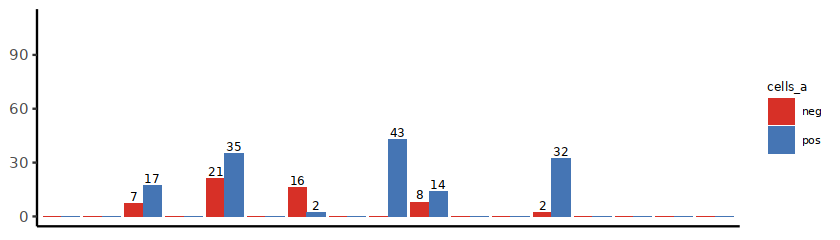

In [13]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other')
ggp_d5_other = make_marker_bars(markers_d5_other, cluster_categories, 110) +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_other

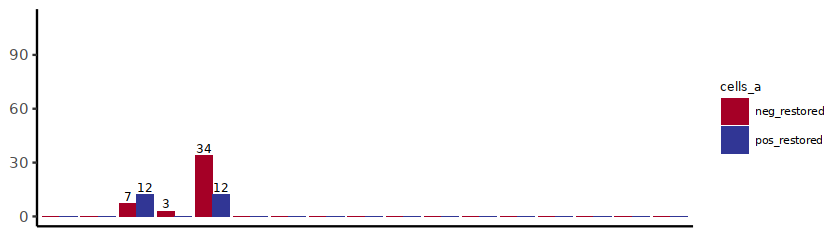

In [14]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'other')
ggp_d5_other_restored = make_marker_bars(markers_d5_other, cluster_categories, 110)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_other_restored

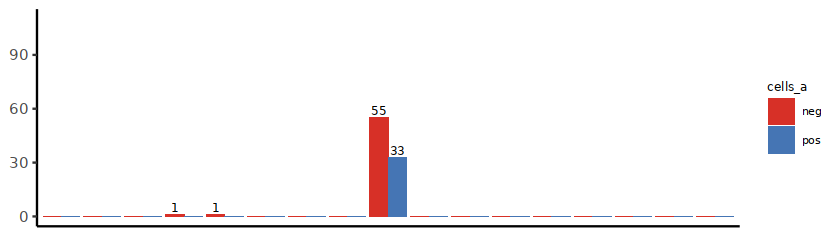

In [15]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other')
ggp_d14_other = make_marker_bars(markers_d14_other, cluster_categories, 110)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d14_other

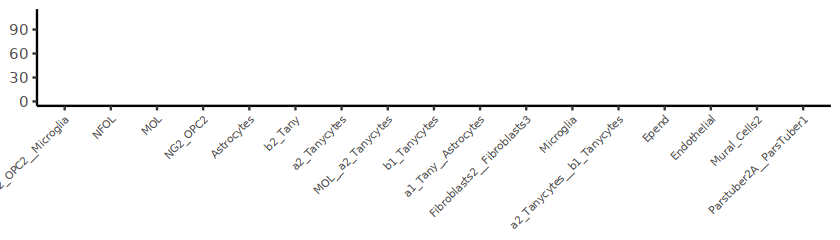

In [16]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'other')
ggp_d14_other_restored = make_marker_bars(markers_d14_other, cluster_categories, 110)
ggp_d14_other_restored

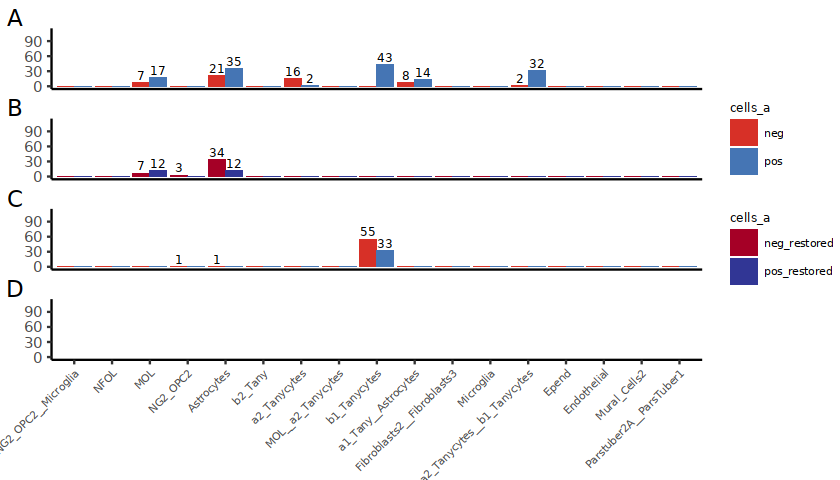

In [17]:
options(repr.plot.width=7, repr.plot.height=4)
layout <- '
A
B
C
D
'
ggp_all_other = wrap_plots(A = ggp_d5_other,
               B = ggp_d5_other_restored,
               C = ggp_d14_other,
               D = ggp_d14_other_restored,
        design = layout) +
    plot_annotation(tag_levels = c('A', 'B', 'C', 'D')) +
    plot_layout(guides = 'collect') & 
      theme(plot.margin = margin(2, 0, 0, 2))

ggp_all_other %>% ggsave('gost_count_plot_other.pdf', plot = ., width = 7, height=4)
ggp_all_other

In [18]:
cluster_categories = labels_classes_tib %>% filter(class == 'neuron') %>% pull(cluster)
cluster_categories

[1] "Nr5a1_Bdnf"                "Unassigned1.sc17.sc28"    
 [3] "Sst_Pthlh__Ghrh"           "Gm8773_Tac1__Hdc"         
 [5] "Unassigned1.sc37"          "Tbx19"                    
 [7] "Th_Nfib__Arx_Nr5a2"        "Slc17a6_Fam19a2"          
 [9] "Nr5a1_Bdnf__Unassigned1"   "Tmem215"                  
[11] "Unassigned2"               "Ghrh"                     
[13] "Nr5a1_Bdnf__Nr5a1_Nfib"    "Pomc_Glipr1__Slc17a6_Trhr"
[15] "Unassigned1.sc39"          "Oxt__Unassigned1"         
[17] "Unassigned2__Unassigned1"  "Nr5a1_Nfib"               
[19] "Sst_Pthlh.sc21"            "Kisspeptin"               
[21] "Sst_Pthlh.sc23"            "Gpr50"                    
[23] "Trh_Lef1"                  "Sst_Nts"                  
[25] "Pomc_Lepr"                 "Th_Slc6a3"                
[27] "Agrp"                      "Slc17a6_Trhr"             
[29] "Qrfp"                      "Unassigned2__Rgs16_Vip"   
[31] "Htr3b"                     "Trh_Cxcl12"               
[33] "Nfix_Htr2c"                "Sst_Unc13c__Agrp"         
[35] "Rgs16_Nmu"                 "Rgs16_Dlx1__Unassigned2"  
[37] "Rgs16_Dlx1"

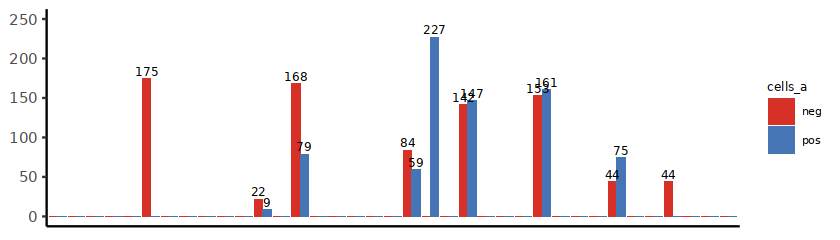

In [19]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'neuron')
ggp_d5_neuron = make_marker_bars(markers_d5_neuron, cluster_categories, 250) +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_neuron

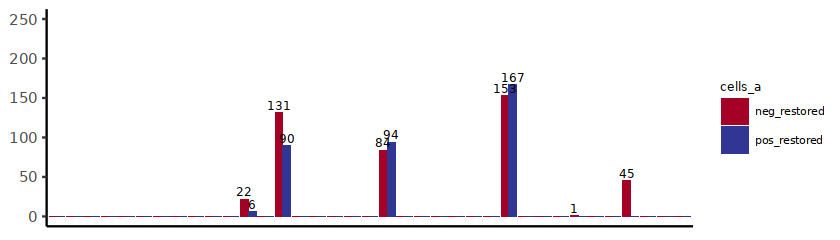

In [20]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'neuron')
ggp_d5_neuron_restored = make_marker_bars(markers_d5_neuron, cluster_categories, 250)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_neuron_restored

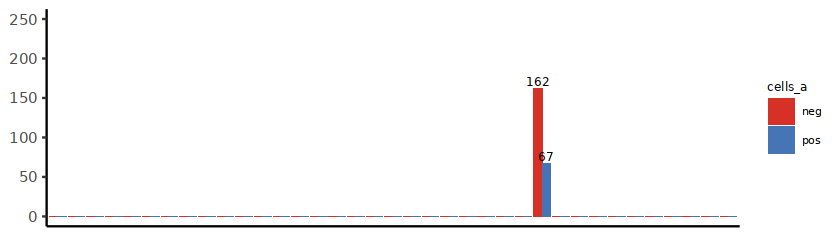

In [21]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'neuron')
ggp_d14_neuron = make_marker_bars(markers_d14_neuron, cluster_categories, 250)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d14_neuron

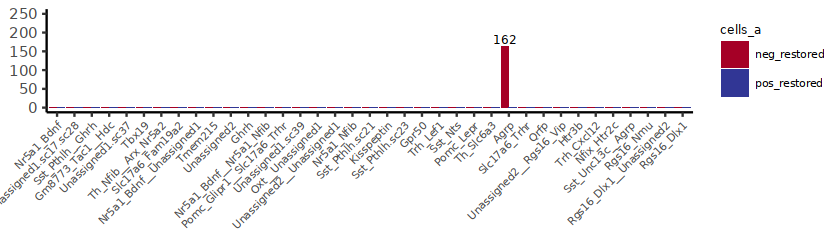

In [22]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'restored_grouping') %>%
    mutate(cells_a = factor(cells_a, levels=c('neg_restored', 'pos_restored'))) %>%
    filter(class == 'neuron')
ggp_d14_neuron_restored = make_marker_bars(markers_d14_neuron, cluster_categories, 250)
ggp_d14_neuron_restored

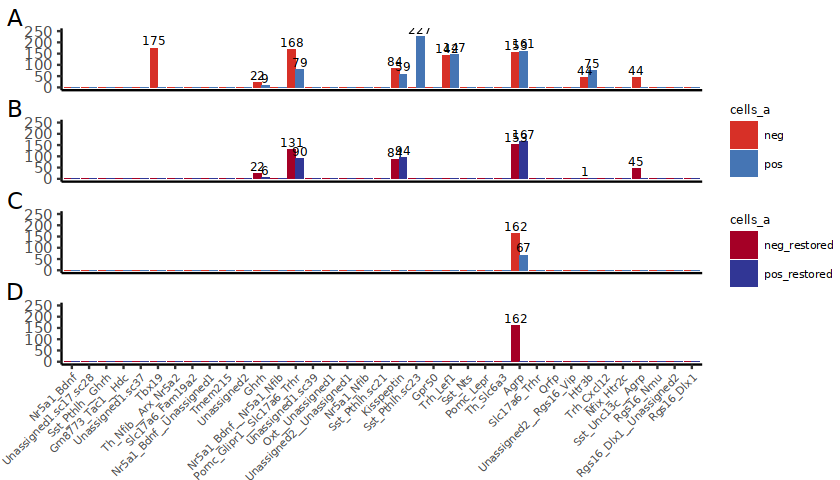

In [23]:
options(repr.plot.width=7, repr.plot.height=4)
layout <- '
A
B
C
D
'
ggp_all_neuron = wrap_plots(A = ggp_d5_neuron,
               B = ggp_d5_neuron_restored,
               C = ggp_d14_neuron,
               D = ggp_d14_neuron_restored,
        design = layout) +
    plot_annotation(tag_levels = c('A', 'B', 'C', 'D')) +
    plot_layout(guides = 'collect') & 
      theme(plot.margin = margin(2, 0, 0, 2))

ggp_all_neuron %>% ggsave('gost_count_plot_neuron.pdf', plot = ., width = 7, height=4)
ggp_all_neuron